In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../Optimus")

In [3]:
# import os
# os.path.getsize('C:\\Python27\\Lib\\genericpath.py')

In [4]:
from optimus import Optimus

https://medium.com/mindorks/speeding-up-text-pre-processing-using-dask-45cc3ede1366

https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

https://towardsdatascience.com/introduction-to-nlp-part-1-preprocessing-text-in-python-8f007d44ca96

https://towardsdatascience.com/introduction-to-nlp-part-2-difference-between-lemmatisation-and-stemming-3789be1c55bc

https://towardsdatascience.com/introduction-to-nlp-part-3-tf-idf-explained-cedb1fc1f7dc


Kfolds and grid search
https://ethen8181.github.io/machine-learning/model_selection/model_selection.html


In [5]:
# op = Optimus("dask", threads_per_worker=8, n_workers=1)
op = Optimus("pandas")

In [6]:
# op = Optimus("dask")
op.client

<module 'pandas' from 'C:\\Users\\argenisleon\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [7]:
import random
[random.randint(0,10) for i in range(5)]

[9, 4, 10, 8, 0]

In [58]:
import numpy as np
size = 1000
data = {
    "length":[round(random.uniform(1,2),1) for i in range(size)], 
    "width": [round(random.uniform(1,1.5),1) for i in range(size)], 
    "height": [random.randint(20,50) for i in range(size)],
    "type": [random.randint(0,1) for i in range(size)]
}

df = op.create.dataframe(data).repartition(4).execute()
df["d_weight"] = df["height"]*df["width"]*df["length"]*[random.uniform(1,1) for i in range(size)]
df = df.cols.round("d_weight",1)

In [9]:
df = df.cols.set("type",value=1, where=df["d_weight"]<40, default=0)

In [10]:
df.print()

     length        width     height       type     d_weight
  (float64)    (float64)    (int64)    (int64)    (float64)
-----------  -----------  ---------  ---------  -----------
        1.6          1.4         39          0         87.4
        1.9          1.3         34          0         84
        1.1          1.4         39          0         60.1
        1.4          1.5         37          0         77.7
        1.1          1.1         40          0         48.4
        1.7          1.4         36          0         85.7
        1.2          1.2         42          0         60.5
        1.8          1.3         43          0        100.6
        1.5          1           45          0         67.5


#### Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html
https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

In [11]:
lm = df.ml.linear_regression("height","d_weight")

In [12]:
lm

In [13]:
lm.predict(36)

[66.32442295524834]

In [14]:
print(lm.scores())

{'neg_mean_absolute_error': [-13.046533859445827, -12.58565083857221, -12.659623675051286, -12.062844673614947, -12.995350375429535], 'neg_mean_squared_error': [-283.52806432093314, -243.08506430586368, -251.08576402403014, -220.35236107213444, -260.11636110595106], 'neg_root_mean_squared_error': [-16.83829160933297, -15.591185468265833, -15.84568597518044, -14.844270311205413, -16.128123297704263], 'r2': [0.5107837480012107, 0.5242205947499938, 0.44510735869020446, 0.5285236516651584, 0.5166597845465314]}


In [15]:
print(lm.evaluate())

{'accuracy': 0.5139094271448392, 'standard deviation': 0.030591851296177586}


In [16]:
lm.coef()

[1.786156292445545]

In [17]:
lm.intercept()

2.022796427208725

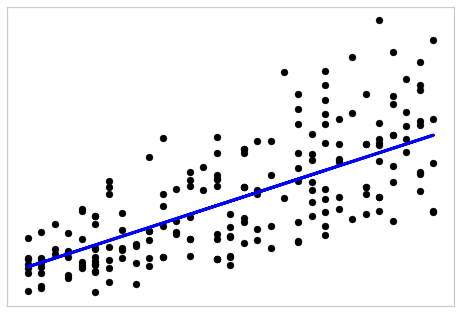

In [18]:
lm.plot()

Interpreting https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

## MLR Multiple Linear Regresion

In [19]:
df

length 1 (float64) not nullable,width 2 (float64) not nullable,height 3 (int64) not nullable,type 4 (int64) not nullable,d_weight 5 (float64) not nullable
1.6,1.4,39,0,87.4
1.9,1.3,34,0,84.0
1.1,1.4,39,0,60.1
1.4,1.5,37,0,77.7
1.1,1.1,40,0,48.4
1.7,1.4,36,0,85.7
1.2,1.2,42,0,60.5
1.8,1.3,43,0,100.6
1.5,1.0,45,0,67.5


In [20]:
lm = df.ml.linear_regression(["length","width","height"],"d_weight", test_size=0.2)

In [21]:
print(lm.predict([[1.4,1.38,25]]))

[49.54404714554343]


In [22]:
print(lm.coef())

[42.91731948148191, 51.696074058828785, 1.8375222351794886]


In [23]:
# print(lm.intercept())
print(lm.evaluate())
# print(lm.scores())

{'accuracy': 0.9669581465576755, 'standard deviation': 0.0027843466291981984}


Can not be plot bease of multiple dimmensions

In [24]:
# lm.plot()

## Logistic regression 

* https://www.kaggle.com/ankitagarwal/logistic-regression-with-k-fold
* https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6
* https://medium.com/@oluwabukunmige/logistic-regression-in-scikit-learn-a-step-by-step-process-32f546241f32
* https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [26]:
df = op.create.dataframe(df)

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
df.print()

  sepal length (cm)    sepal width (cm)    petal length (cm)    petal width (cm)       target
          (float64)           (float64)            (float64)           (float64)    (float64)
-------------------  ------------------  -------------------  ------------------  -----------
                5.1                 3.5                  1.4                 0.2            0
                4.9                 3                    1.4                 0.2            0
                4.7                 3.2                  1.3                 0.2            0
                4.6                 3.1                  1.5                 0.2            0
                5                   3.6                  1.4                 0.2            0
                5.4                 3.9                  1.7                 0.4            0
                4.6                 3.4                  1.4                 0.3            0
                5                   3.4                  1.5

In [29]:
lr = df.ml.logistic_regression([0,1,2,3],"target", test_size=0.2)

In [30]:
lr.predict([[5.1,3.5,1.4,0.2]])

[0.0]

In [31]:
lr.predict_proba([[5.1,3.5,1.4,0.2]])

[[0.876409999377024, 0.12355539519727043, 3.460542570566982e-05]]

In [32]:
lr.evaluate()

{'accuracy': 0.94, 'standard deviation': 0.9}

C:\Users\argenisleon\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


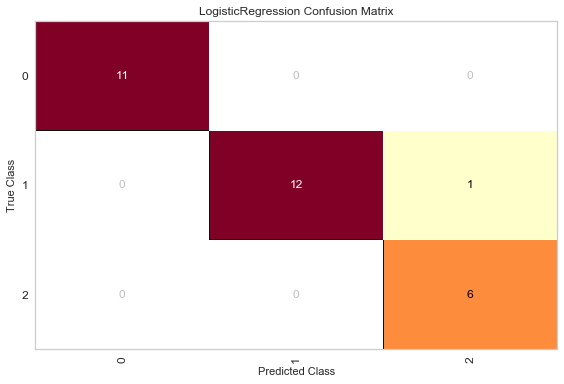

In [33]:
lr.confusion_matrix()

In [34]:
import sklearn
sklearn.__version__

# !pip install --upgrade --force-reinstall --user sklearn

'0.24.1'

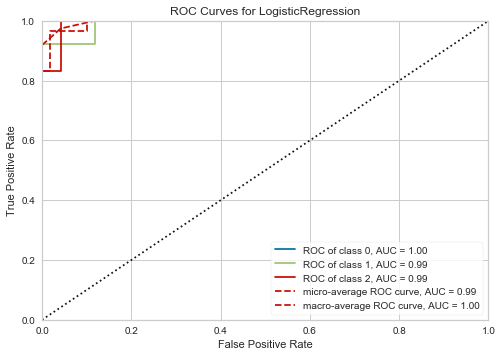

In [35]:
lr.roc_auc()

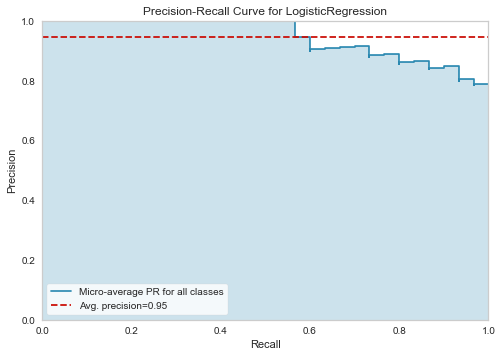

In [36]:
lr.precision_recall()

ROC https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248#:~:text=The%20precision%2Drecall%20curve%20is%20constructed%20by%20calculating%20and%20plotting,belonging%20to%20the%20positive%20class.


https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb
precision, recall, F1 Score, ROC Curve, etc

## Random Forest

https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

In [63]:
rf = df.ml.random_forest("height","d_weight", test_size=0.2,fit_intercept=False,)
rf.score()
# df.ml.random_forest(["reclat","reclong"],"mass (g)", test_size=0.2, n_estimators=100)

model <optimus.engines.pandas.ml.models.Model object at 0x00000259F6EF1948>


C:\Users\argenisleon\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass criterion=mse, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=0, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


TypeError: 'NoneType' object is not callable

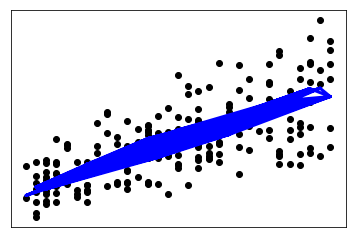

In [91]:
rf.plot()

In [ ]:
rf = df.ml.random_forest(["length","width","height"],"weight", test_size=0.2,fit_intercept=False,)
rf.score()
# df.ml.random_forest(["reclat","reclong"],"mass (g)", test_size=0.2, n_estimators=100)

In [83]:
rf.eval()

{'mean_absolute_error': 1.9681966786884082,
 'mean_squared_error': 6.834247717452712,
 'root_mean_squared_error': 2.6142394147156285,
 'r_square': 0.9848325157200486}

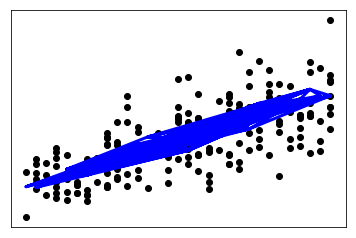

In [653]:
rf.plot()

## KMeans

https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Clustering performace evaluation
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [36]:
df.display()

sepal length (cm) 1 (float64) not nullable,sepal width (cm) 2 (float64) not nullable,petal length (cm) 3 (float64) not nullable,petal width (cm) 4 (float64) not nullable,target 5 (float64) not nullable
5.1,3.5,1.4,0.2,0.0
4.9,3.0,1.4,0.2,0.0
4.7,3.2,1.3,0.2,0.0
4.6,3.1,1.5,0.2,0.0
5.0,3.6,1.4,0.2,0.0
5.4,3.9,1.7,0.4,0.0
4.6,3.4,1.4,0.3,0.0
5.0,3.4,1.5,0.2,0.0
4.4,2.9,1.4,0.2,0.0


In [37]:
km = df.ml.k_means([0,1,2,3],"target",3, methods=["k-means++"])
# km = df.ml.k_means([0,1,2,3],"target",3, methods=["random","k-means++"])

In [38]:
km.predict([[5.1,3.5,1.4,0.2],[6.2,2.9,4.3,1.3]])
# km.predict([[5.1,3.5,1.4,0.2]])

[0, 1]

In [39]:
km.scores()

{'inertia': 139.82049635974974,
 'homogeneity_score': 0.6591265018049008,
 'completeness_score': 0.6598476779627759,
 'v_measure_score': 0.659486892724918,
 'adjusted_rand_score': 0.6201351808870379,
 'adjusted_mutual_info_score': 0.6552228479234864,
 'silhouette_score': 0.5061527484935536}

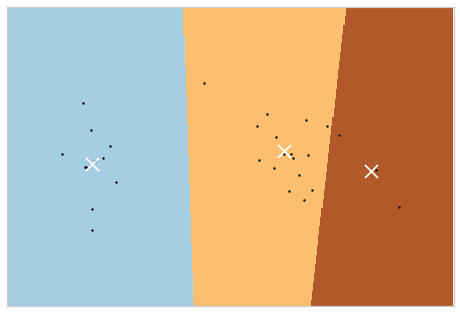

In [46]:
km.plot_clusters()

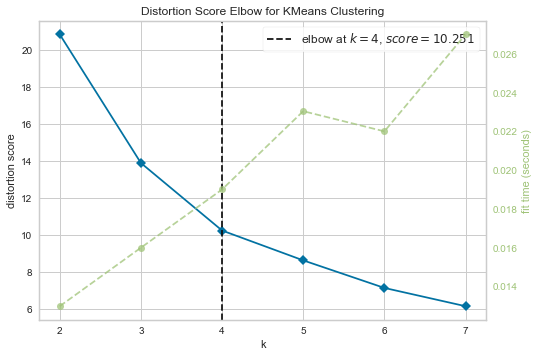

In [62]:
km.plot_elbow(2,8)

## PCA
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [65]:
df

sepal length (cm) 1 (float64) not nullable,sepal width (cm) 2 (float64) not nullable,petal length (cm) 3 (float64) not nullable,petal width (cm) 4 (float64) not nullable,target 5 (float64) not nullable
5.1,3.5,1.4,0.2,0.0
4.9,3.0,1.4,0.2,0.0
4.7,3.2,1.3,0.2,0.0
4.6,3.1,1.5,0.2,0.0
5.0,3.6,1.4,0.2,0.0
5.4,3.9,1.7,0.4,0.0
4.6,3.4,1.4,0.3,0.0
5.0,3.4,1.5,0.2,0.0
4.4,2.9,1.4,0.2,0.0


In [105]:
df.ml.PCA([0,1,2,3],n_components=2).print(6)

      PCA_0        PCA_1
  (float64)    (float64)
-----------  -----------
   -2.2647      0.480027
   -2.08096    -0.674134
   -2.36423    -0.341908
   -2.29938    -0.597395
   -2.38984     0.646835


In [108]:
df.ml.PCA([0,1,2,3], "target",n_components=2).print(6)

      PCA_0        PCA_1       target
  (float64)    (float64)    (float64)
-----------  -----------  -----------
   -2.2647      0.480027            0
   -2.08096    -0.674134            0
   -2.36423    -0.341908            0
   -2.29938    -0.597395            0
   -2.38984     0.646835            0


## Loading and Saving Models

In [55]:
lr.save("model.sav")

In [56]:
m =op.load.model("model.sav")

In [57]:
m

LogisticRegression(n_jobs=1, solver='liblinear')

In [53]:
m.predict([[6.3,3.3,4.7,1.6]])

array([2.])